In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\Merged_QVI_transactions.csv')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g,MIDAGE SINGLES/COUPLES,Budget
1,2019-05-16,4,4149,3333,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-17,7,7215,7176,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-15,19,19272,16686,44,1,3.3,Thins Chips Light Tangy,175g,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-18,45,45220,41651,22,1,3.3,Thins Chips Originl saltd,175g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
49765,2018-08-24,271,271051,268506,47,2,8.8,Doritos Corn Chips Original,170g,YOUNG SINGLES/COUPLES,Premium
49766,2018-11-04,271,271193,269365,33,2,7.6,Cobs Popd Swt Chlli Sr Cream Chips,110g,YOUNG SINGLES/COUPLES,Premium
49767,2019-05-29,271,271193,269366,75,2,7.6,Cobs Popd Sea Salt Chips,110g,YOUNG SINGLES/COUPLES,Premium
49768,2019-03-25,272,272194,269908,75,2,7.6,Cobs Popd Sea Salt Chips,110g,YOUNG SINGLES/COUPLES,Premium


In [3]:
df['TXN_ID'].nunique()

49712

*Filtering out Control Stores*

In [4]:
df['DATE']=pd.to_datetime(df['DATE'])
df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_QTY                     int64
TOT_SALES                  float64
BRAND_NAME                  object
PACK_SIZE_GRAMS             object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [5]:
df['MONTHS']=df['DATE'].dt.strftime('%m/%Y')
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS,LIFESTAGE,PREMIUM_CUSTOMER,MONTHS
0,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g,MIDAGE SINGLES/COUPLES,Budget,05/2019
1,2019-05-16,4,4149,3333,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g,MIDAGE SINGLES/COUPLES,Budget,05/2019
2,2019-05-17,7,7215,7176,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g,MIDAGE SINGLES/COUPLES,Budget,05/2019
3,2019-05-15,19,19272,16686,44,1,3.3,Thins Chips Light Tangy,175g,MIDAGE SINGLES/COUPLES,Budget,05/2019
4,2019-05-18,45,45220,41651,22,1,3.3,Thins Chips Originl saltd,175g,MIDAGE SINGLES/COUPLES,Budget,05/2019


isolating Dataset to trial period: Prior feb 2019

In [6]:
ctrl_data=df[df['DATE'] < '2019-03-01'].sort_values(by='DATE')
ctrl_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS,LIFESTAGE,PREMIUM_CUSTOMER,MONTHS
1504,2018-07-01,67,67107,64442,21,2,3.8,WW Sour Cream OnionStacked Chips,160g,MIDAGE SINGLES/COUPLES,Mainstream,07/2018
8869,2018-07-01,169,169044,171083,96,1,1.9,WW Original Stacked Chips,160g,OLDER FAMILIES,Budget,07/2018
257,2018-07-01,68,68193,65598,44,2,6.6,Thins Chips Light Tangy,175g,MIDAGE SINGLES/COUPLES,Budget,07/2018
12322,2018-07-01,191,191096,192344,29,2,6.0,French Fries Potato Chips,175g,OLDER FAMILIES,Mainstream,07/2018
38172,2018-07-01,262,262057,261646,96,2,3.8,WW Original Stacked Chips,160g,YOUNG FAMILIES,Budget,07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
8814,2019-02-28,166,166376,168769,44,1,3.3,Thins Chips Light Tangy,175g,OLDER FAMILIES,Budget,02/2019
21889,2019-02-28,257,257014,255793,44,2,6.6,Thins Chips Light Tangy,175g,OLDER SINGLES/COUPLES,Mainstream,02/2019
19013,2019-02-28,26,26309,23613,44,2,6.6,Thins Chips Light Tangy,175g,OLDER SINGLES/COUPLES,Mainstream,02/2019
26495,2019-02-28,93,93064,91014,110,2,3.8,WW Original Corn Chips,200g,RETIREES,Budget,02/2019


**Searching For Marching control Stores Based on Their Overall Monthly Sales**

*Total Sales*

In [27]:
overall_store_sales=ctrl_data.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
overall_store_sales

,STORE_NBR,TOT_SALES
0,1,273.1
1,2,253.3
2,3,1602.8
3,4,1964.4
4,5,984.6
...,...,...
259,268,333.5
260,269,1381.5
261,270,1359.8
262,271,1187.5


**Trial stores Total Sales: 77, 86 and 88**

In [9]:
overall_store_sales[overall_store_sales['STORE_NBR'].isin([77,86,88])]

,STORE_NBR,TOT_SALES
74,77,321.1
82,86,1247.6
84,88,2010.2


*Overall Monthly Store Sales*

In [10]:
store_sales_all=ctrl_data.groupby(['STORE_NBR', 'MONTHS'])['TOT_SALES'].sum().reset_index()
store_sales_all.set_index('STORE_NBR')

,MONTHS,TOT_SALES
STORE_NBR,,
1,01/2019,16.8
1,02/2019,20.9
1,07/2018,40.9
1,08/2018,22.0
1,09/2018,70.8
...,...,...
272,08/2018,63.4
272,09/2018,52.6
272,10/2018,98.4


In [11]:
pivot_chips_sales= store_sales_all.pivot_table(index='MONTHS', columns='STORE_NBR', values='TOT_SALES')
pivot_chips_sales

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
MONTHS,,,,,,,,,,,,,,,,,,,,,
01/2019,16.8,38.6,167.1,218.8,115.2,36.2,205.6,79.2,80.8,155.8,...,1.9,56.3,24.8,29.5,NaN,19.0,168.0,186.4,146.0,95.9
02/2019,20.9,51.1,213.8,237.6,111.0,27.6,198.5,62.4,24.1,159.0,...,NaN,54.4,45.0,23.5,NaN,26.0,208.0,189.6,133.6,81.2
07/2018,40.9,22.8,193.6,294.8,138.0,35.9,132.8,38.4,31.2,145.8,...,11.7,46.9,44.6,31.3,6.2,57.3,184.0,163.4,158.4,33.9
08/2018,22.0,27.3,238.7,265.4,110.6,24.6,171.6,69.8,41.0,138.7,...,5.8,23.8,47.9,10.9,3.3,67.8,155.5,191.8,109.1,63.4
09/2018,70.8,30.9,184.2,261.4,112.0,37.1,179.0,45.9,43.0,175.4,...,6.6,24.3,25.4,15.1,NaN,20.5,125.4,178.2,157.4,52.6
10/2018,33.5,31.7,242.0,290.4,130.0,51.0,170.2,35.2,43.4,189.4,...,NaN,40.2,16.6,16.1,NaN,45.1,248.6,159.6,173.8,98.4
11/2018,48.5,21.4,167.8,190.4,120.8,41.3,179.1,78.6,76.8,105.8,...,6.6,15.4,77.3,21.6,7.7,64.4,160.4,115.8,140.4,106.8
12/2018,19.7,29.5,195.6,205.6,147.0,25.4,108.4,65.0,66.0,214.4,...,8.8,60.0,42.9,24.9,8.7,33.4,131.6,175.0,168.8,62.8


***Trial Store 77***

*Monthly Sales Correlation*

In [12]:
corr= pivot_chips_sales.corr()
corr1=corr[77].sort_values(ascending=False).head(52).reset_index()
corr1

,STORE_NBR,77
0,77,1.000000
1,11,1.000000
2,161,0.944745
3,106,0.896110
4,199,0.863535
5,88,0.818069
6,99,0.813535
7,198,0.795754
8,239,0.790008
9,248,0.774881


*Sorting out best Correlations on both Overall Total Sales and Monthly Sales*

In [13]:
overall_store_sales77=overall_store_sales[overall_store_sales['TOT_SALES'].between(221, 390, inclusive='both')].sort_values('TOT_SALES', ascending=False)
overall_store_sales77.merge(corr1, how = 'inner', on='STORE_NBR')

,STORE_NBR,TOT_SALES,77
0,41,346.7,0.575698
1,77,321.1,1.000000


*Best Sales Trend*

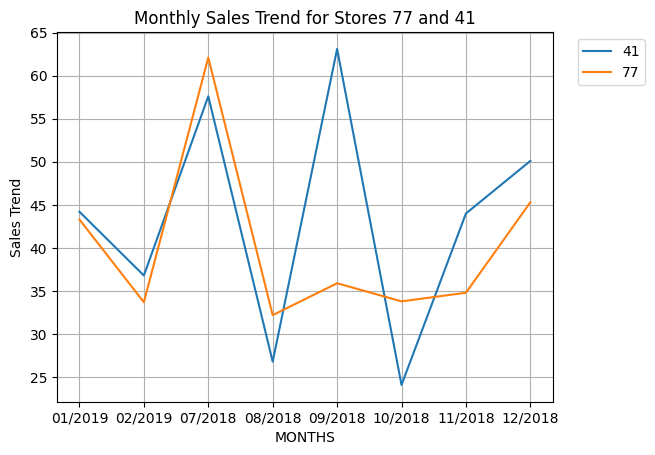

In [14]:
pivot_chips_sales[[41,77]].plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.title('Monthly Sales Trend for Stores 77 and 41')
plt.ylabel('Sales Trend')
plt.grid()
plt.show()

Store 41 had a close Total sales to the trial store  
Store 41 had a good monthly sales Trend with Trial store 77,  
**The Control store is store 41**

***Trial Store 86***

*Monthly Sales Correlation*

In [15]:
corr2=corr[86].sort_values(ascending=False).head(22).reset_index()
corr2

,STORE_NBR,86
0,86,1.000000
1,11,1.000000
2,158,0.838606
3,124,0.831267
4,246,0.830203
5,126,0.813430
6,152,0.770324
7,272,0.729924
8,59,0.726947
9,267,0.719794


*Sorting out best Correlations on both Overall Total Sales and Monthly Sales*

In [16]:
overall_store_sales86=overall_store_sales[overall_store_sales['TOT_SALES'].between(1200, 1400, inclusive='both')].sort_values('TOT_SALES', ascending=False)
overall_store_sales86.merge(corr2, how = 'inner', on='STORE_NBR')

,STORE_NBR,TOT_SALES,86
0,152,1329.9,0.770324
1,86,1247.6,1.000000
2,13,1205.5,0.668079


*Best Sales Trend*

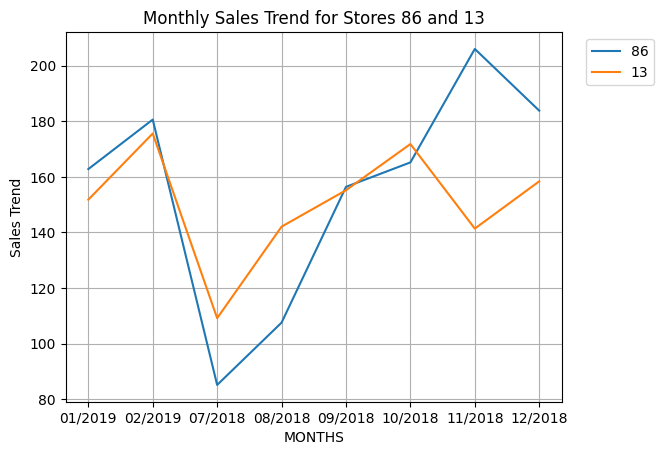

In [17]:
pivot_chips_sales[[86,13]].plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.title('Monthly Sales Trend for Stores 86 and 13')
plt.ylabel('Sales Trend')
plt.grid()
plt.show()

Store 13 had a close Total sales to the trial store  
Store 13 had a good monthly sales Trend with Trial store 86,  
**The Control store is store 13**

**Trial Store 88**

*Monthly Sales Correlation*

In [18]:
corr3=corr[88].sort_values(ascending=False).head(48).reset_index()
corr3

,STORE_NBR,88
0,88,1.000000
1,11,1.000000
2,161,0.971510
3,17,0.876538
4,184,0.867072
5,230,0.852418
6,198,0.846973
7,239,0.842212
8,77,0.818069
9,250,0.798774


*Sorting out best Correlations on both Overall Total Sales and Monthly Sales*

In [19]:
overall_store_sales88=overall_store_sales[overall_store_sales['TOT_SALES'].between(1500, 2100, inclusive='both')].sort_values('TOT_SALES', ascending=False)
overall_store_sales88.merge(corr3, how = 'inner', on='STORE_NBR')

,STORE_NBR,TOT_SALES,88
0,88,2010.2,1.000000
1,165,1826.4,0.497870
2,81,1678.5,0.750675
3,250,1587.3,0.798774
4,72,1565.6,0.493515
5,199,1507.7,0.753180


*Best Sales Trend*

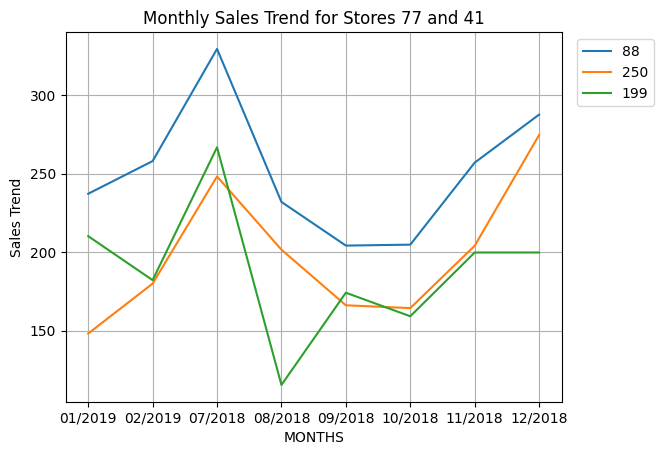

In [20]:
pivot_chips_sales[[88,250,199]].plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.title('Monthly Sales Trend for Stores 77 and 41')
plt.ylabel('Sales Trend')
plt.grid()
plt.show()

Store 250 had a relatively close Total sales to the trial store  
Store 250 had a good monthly sales Trend with Trial store 88,  
**The Control store is store 250**

**Comparing Trial and Control Stores Based on :**

*Total No of Customers*

***Store Pairs***

In [76]:
total_sales=ctrl_data.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
total_sales.set_index('STORE_NBR', inplace=True)
total_sales.loc[[(77),(41),(86),(13),(88),(250)]]

,TOT_SALES
STORE_NBR,
77,321.1
41,346.7
86,1247.6
13,1205.5
88,2010.2
250,1587.3


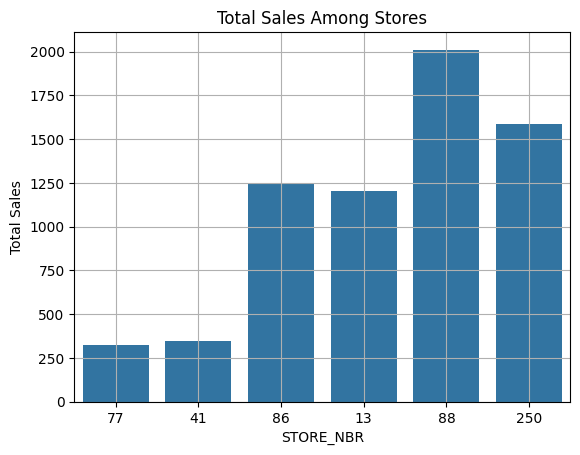

In [83]:
sales=total_sales.loc[[(77),(41),(86),(13),(88),(250)]]
sales.reset_index(drop=True)
sns.barplot(data=sales, y='TOT_SALES', x='STORE_NBR', order=[77,41,86,13,88,250])
plt.title('Total Sales Among Stores')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

[77 & 41], [86 & 13] and [88 & 250]

In [67]:
total_customers=ctrl_data.groupby('STORE_NBR')['LYLTY_CARD_NBR'].count().reset_index()
total_customers.set_index('STORE_NBR', inplace=True)
total_customers.loc[[(77),(41),(86),(13),(88),(250)]]

,LYLTY_CARD_NBR
STORE_NBR,
77,64
41,81
86,196
13,180
88,257
250,207


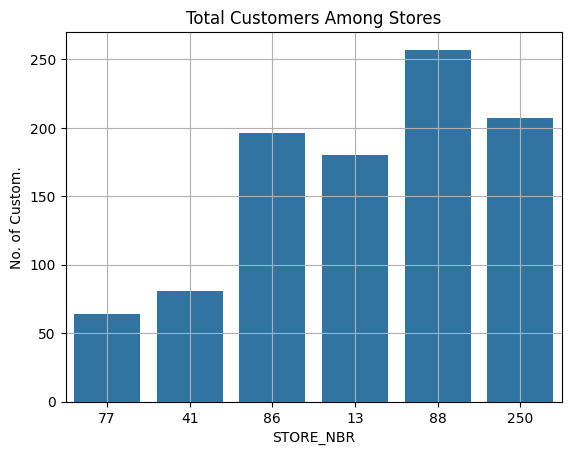

In [85]:
sales=total_customers.loc[[(77),(41),(86),(13),(88),(250)]]
sales.reset_index(drop=True)
sns.barplot(data=sales, y='LYLTY_CARD_NBR', x='STORE_NBR', order=[77,41,86,13,88,250])
plt.title('Total Customers Among Stores')
plt.ylabel('No. of Custom.')
plt.grid()
plt.show()

*Total No of Transactions*

In [72]:
total_transactions=ctrl_data.groupby('STORE_NBR')['TXN_ID'].count().reset_index()
total_transactions.set_index('STORE_NBR', inplace=True)
total_transactions.loc[[(77),(41),(86),(13),(88),(250)]]

,TXN_ID
STORE_NBR,
77,64
41,81
86,196
13,180
88,257
250,207


since no. of customers equal no. of transactions, it means there was no repurchase by the customers

*No. of Products Sold*

In [75]:
prod_sold=ctrl_data.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()
prod_sold.set_index('STORE_NBR', inplace=True)
prod_sold.loc[[(77),(41),(86),(13),(88),(250)]]

,PROD_QTY
STORE_NBR,
77,98
41,102
86,390
13,360
88,510
250,404


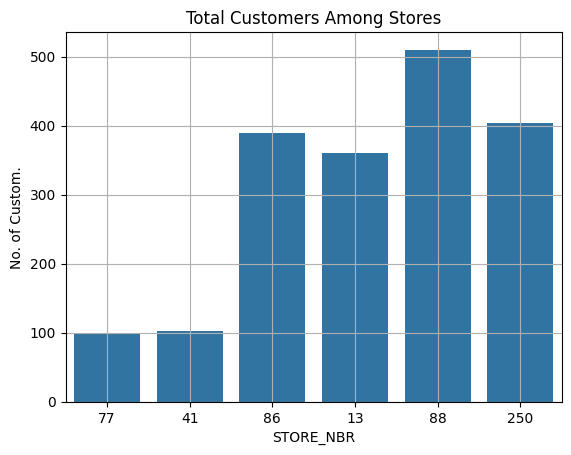

In [86]:
sales=prod_sold.loc[[(77),(41),(86),(13),(88),(250)]]
sales.reset_index(drop=True)
sns.barplot(data=sales, y='PROD_QTY', x='STORE_NBR', order=[77,41,86,13,88,250])
plt.title('Total Customers Among Stores')
plt.ylabel('No. of Custom.')
plt.grid()
plt.show()

We can see that these stores are closely related in all three parameters with thier pairs  
Store 88 and 250 had the highest differences, this was due to low customer turn up in control store 250  
thus we can say that the trial methods were successful as they yielded more sales.